In [208]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [209]:
# loading data
df_voice = pd.read_csv("./src/gender_voice_dataset.csv")

# Feature engineering


## Missing values

In [210]:
df_voice.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Nie mamy żadnych brakujących wartości więc nie musimy się przejmować wypełnianiem braków.

## Outliers

---

In [211]:
df_voice.shape

(3168, 21)

In [212]:
columns = df_voice.columns[1:20]   
for column in columns:
    factor = 4
    upper_lim = df_voice[column].mean () + df_voice[column].std () * factor
    lower_lim = df_voice[column].mean () - df_voice[column].std () * factor
    df_voice = df_voice[(df_voice[column] < upper_lim) & (df_voice[column] > lower_lim)]
df_voice.reset_index(inplace = True)
df_voice.drop(axis = 1, columns = ['index'], inplace = True)

In [213]:
df_voice.shape

(2949, 21)

# Usuwamy mocno skorelowane kolumny

---

In [1]:
c = df_voice.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so = so.loc[(so < 1) & (so > 0.8)]
type(so)
so[::-1]

NameError: name 'df_voice' is not defined

In [215]:
df_voice.drop(axis = 1, columns=['maxdom','meanfreq','centroid','skew',"sfm","sp.ent","sd"],inplace = True)

In [216]:
df_voice.shape

(2949, 14)

In [217]:
df_voice.describe()

,median,Q25,Q75,IQR,kurt,mode,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx
count,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000
mean,0.188208,0.144507,0.226066,0.081558,12.200320,0.172420,0.144361,0.036623,0.260189,0.863398,0.052433,5.176516,0.171745
std,0.033759,0.045143,0.022216,0.040448,15.659715,0.071832,0.030800,0.016271,0.027751,0.507932,0.061858,3.251309,0.102546
min,0.040976,0.002119,0.135023,0.014922,2.068455,0.000000,0.055565,0.009775,0.138889,0.030331,0.004883,0.019531,0.019881
25%,0.172308,0.117253,0.209596,0.041830,5.525481,0.130878,0.119456,0.018735,0.253968,0.460938,0.007812,3.046875,0.103387
50%,0.191191,0.142745,0.227254,0.090769,8.014466,0.190129,0.142627,0.046921,0.272727,0.799267,0.023438,5.132812,0.141026
75%,0.211903,0.176935,0.244356,0.112812,12.686097,0.223524,0.169677,0.047952,0.277457,1.200000,0.070312,7.242188,0.208218
max,0.261224,0.247347,0.273469,0.195527,175.696791,0.280000,0.231135,0.111111,0.279114,2.805246,0.281250,18.164062,0.633584


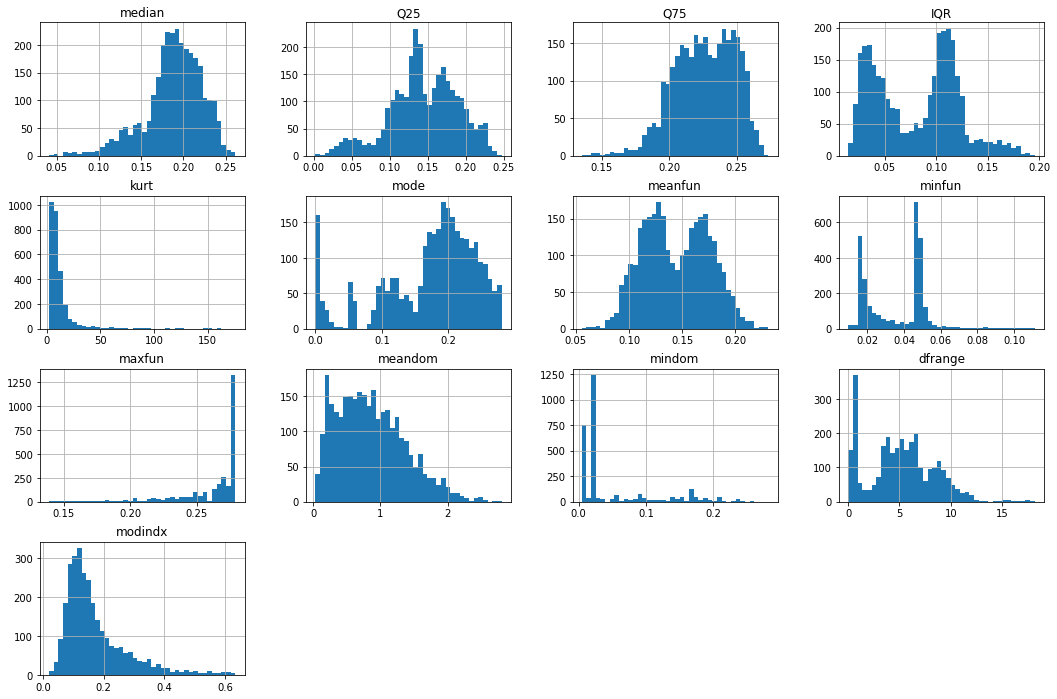

In [218]:
df_voice.hist(bins = 40, figsize=(18, 12))
plt.show()

# Standaryzacja

Standaryzujemy dane aby były zcentrowane do zera i żeby ich wariancje były tego samego rzędu. Robimy to po to, aby żadna zmienna nie dominowała i model mógł się uczyć na wszystkich zmiennych.

In [261]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_voice.drop("label",axis=1))
df_voice_standard = pd.DataFrame(scaler.transform(df_voice.drop("label",axis=1)),columns=['median','Q25','Q75','IQR','kurt','mode','meanfun','minfun','maxfun','meandom','mindom','dfrange','modindx'])
df_voice_standard.describe()

,median,Q25,Q75,IQR,kurt,mode,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx
count,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03
mean,-3.276833e-16,-3.469588e-16,1.310733e-15,7.710196e-17,-5.204382e-16,1.542039e-16,-4.626118e-16,1.734794e-16,4.047853e-16,-2.313059e-16,-3.855098e-17,1.252907e-16,-6.264534e-17
std,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00
min,-4.362076e+00,-3.154668e+00,-4.098841e+00,-1.647735e+00,-2.146557e+00,-2.400750e+00,-2.883410e+00,-1.650307e+00,-4.371693e+00,-1.640394e+00,-7.688267e-01,-4.954654e+00,-1.481178e+00
25%,-4.710793e-01,-6.038348e-01,-7.414738e-01,-9.823819e-01,-7.034739e-01,-5.784319e-01,-8.087174e-01,-1.099528e+00,-2.241812e-01,-7.924862e-01,-7.214569e-01,-1.625134e-01,-6.667216e-01
50%,8.839287e-02,-3.904454e-02,5.348298e-02,2.277668e-01,-1.573025e-01,2.465741e-01,-5.629299e-02,6.330205e-01,4.519023e-01,-1.262821e-01,-4.688177e-01,3.324077e-01,-2.996157e-01
75%,7.020267e-01,7.184529e-01,8.234454e-01,7.728197e-01,5.172036e-01,7.115593e-01,8.220824e-01,6.964096e-01,6.223510e-01,6.628023e-01,2.890998e-01,6.591078e-01,3.557332e-01
max,2.163273e+00,2.278455e+00,2.134166e+00,2.818158e+00,4.377280e+00,1.497922e+00,2.817796e+00,4.578770e+00,6.820800e-01,3.823693e+00,3.699729e+00,1.531702e+00,4.504475e+00


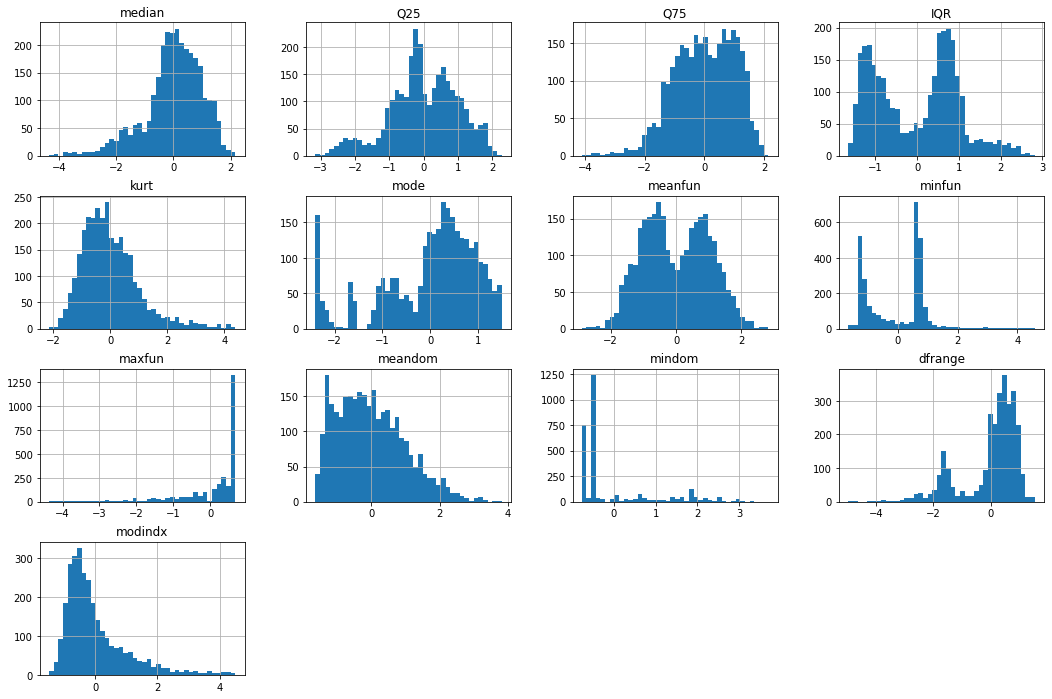

In [243]:
df_voice_standard.hist(bins = 40, figsize=(18, 12))
plt.show()

# Dyskretyzacja

Dyskretyzacji używamy dla nieregularnych rozkładów *mode i dfrange* aby nasze modele lepiej sobie z nimi radziły.

In [262]:
disc = preprocessing.KBinsDiscretizer(n_bins=20, encode='ordinal',strategy="uniform").fit(df_voice_standard[['mode','dfrange']])
df_voice_standard[['mode','dfrange']] = disc.transform(df_voice_standard[['mode','dfrange']])

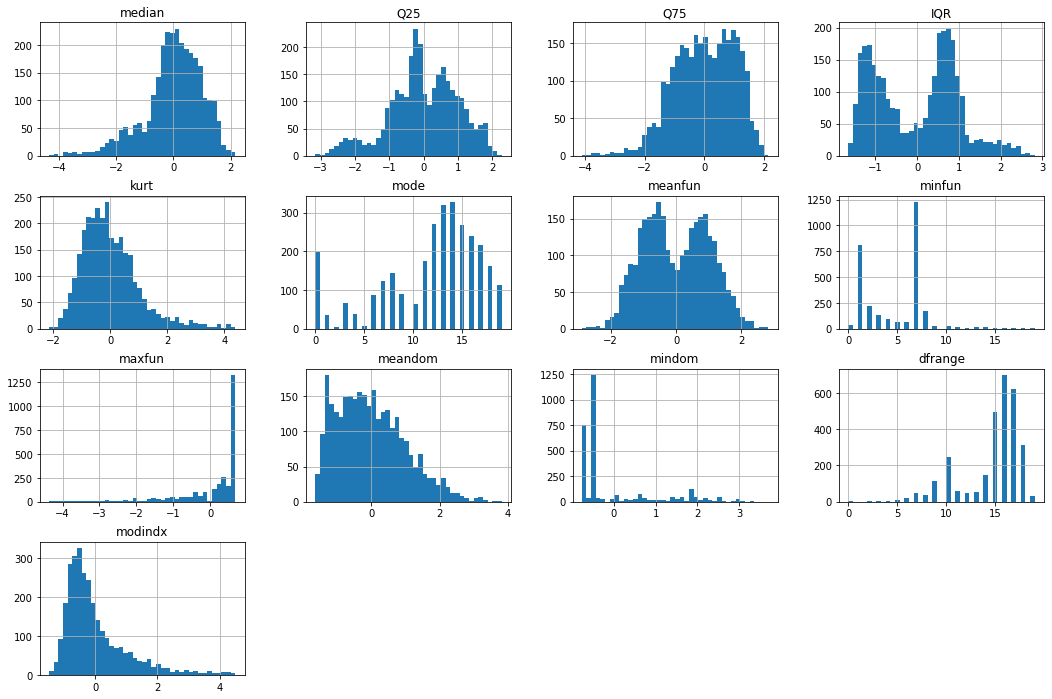

In [253]:
df_voice_standard.hist(bins = 40, figsize=(18, 12))
plt.show()

# Baseline model

In [228]:
df_voice_disc['label'] = df_voice[['label']]
df_voice_standard['label'] = df_voice[['label']]

In [229]:
def baseline_model(data):
    ## warunek meanfun < 0.13 -> male, otherwise: female
    suma = 0
    for i in range(len(data)):
        if(data["meanfun"][i] < 0.14):
            predicted = 'male'
        else:
            predicted = 'female'
        if(predicted == data['label'][i]):
            suma = suma + 1
    return suma / len(data)

In [230]:
baseline_model(df_voice)

0.9501525940996948

# Baseline model x2
Drugi baselinowym modelem będzie regresja logistyczna bez regularyzacji.

In [263]:
# ze standaryzacją 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df_voice_standard['label'] = df_voice[['label']]
X = df_voice_standard.drop('label',axis=1)
y=df_voice_standard[['label']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
lr_base = LogisticRegression(max_iter=1000,penalty="none").fit(X_train,y_train)
y_pred = lr_base.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\komp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9807909604519774